In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
 
ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
 
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [1]:
!pip install pennylane
from IPython.display import clear_output
clear_output()

In [ ]:
import os

def restart_runtime():
  os.kill(os.getpid(), 9)
restart_runtime()

In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np

# Loading Raw Data

In [2]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train_flatten = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])/255.0
x_test_flatten = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])/255.0

In [4]:
print(x_train_flatten.shape, y_train.shape)
print(x_test_flatten.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [5]:
x_train_0 = x_train_flatten[y_train == 0]
x_train_1 = x_train_flatten[y_train == 1]
x_train_2 = x_train_flatten[y_train == 2]
x_train_3 = x_train_flatten[y_train == 3]
x_train_4 = x_train_flatten[y_train == 4]
x_train_5 = x_train_flatten[y_train == 5]
x_train_6 = x_train_flatten[y_train == 6]
x_train_7 = x_train_flatten[y_train == 7]
x_train_8 = x_train_flatten[y_train == 8]
x_train_9 = x_train_flatten[y_train == 9]

x_train_list = [x_train_0, x_train_1, x_train_2, x_train_3, x_train_4, x_train_5, x_train_6, x_train_7, x_train_8, x_train_9]

print(x_train_0.shape)
print(x_train_1.shape)
print(x_train_2.shape)
print(x_train_3.shape)
print(x_train_4.shape)
print(x_train_5.shape)
print(x_train_6.shape)
print(x_train_7.shape)
print(x_train_8.shape)
print(x_train_9.shape)

(5923, 784)
(6742, 784)
(5958, 784)
(6131, 784)
(5842, 784)
(5421, 784)
(5918, 784)
(6265, 784)
(5851, 784)
(5949, 784)


In [6]:
x_test_0 = x_test_flatten[y_test == 0]
x_test_1 = x_test_flatten[y_test == 1]
x_test_2 = x_test_flatten[y_test == 2]
x_test_3 = x_test_flatten[y_test == 3]
x_test_4 = x_test_flatten[y_test == 4]
x_test_5 = x_test_flatten[y_test == 5]
x_test_6 = x_test_flatten[y_test == 6]
x_test_7 = x_test_flatten[y_test == 7]
x_test_8 = x_test_flatten[y_test == 8]
x_test_9 = x_test_flatten[y_test == 9]

x_test_list = [x_test_0, x_test_1, x_test_2, x_test_3, x_test_4, x_test_5, x_test_6, x_test_7, x_test_8, x_test_9]

print(x_test_0.shape)
print(x_test_1.shape)
print(x_test_2.shape)
print(x_test_3.shape)
print(x_test_4.shape)
print(x_test_5.shape)
print(x_test_6.shape)
print(x_test_7.shape)
print(x_test_8.shape)
print(x_test_9.shape)

(980, 784)
(1135, 784)
(1032, 784)
(1010, 784)
(982, 784)
(892, 784)
(958, 784)
(1028, 784)
(974, 784)
(1009, 784)


# Selecting the dataset

Output: X_train, Y_train, X_test, Y_test

In [182]:
X_train = np.concatenate((x_train_list[0][:200, :], x_train_list[1][:200, :]), axis=0)
Y_train = np.zeros((X_train.shape[0],))
Y_train[200:] += 1

X_train.shape, Y_train.shape

((400, 784), (400,))

In [183]:
X_test = np.concatenate((x_test_list[0][:500, :], x_test_list[1][:500, :]), axis=0)
Y_test = np.zeros((X_test.shape[0],))
Y_test[500:] += 1

X_test.shape, Y_test.shape

((1000, 784), (1000,))

In [7]:
num_sample = 100
X_train = x_train_list[0][:num_sample, :]
X_test = x_test_list[0][:5*num_sample, :]

Y_train = np.zeros((10*X_train.shape[0],), dtype=int)
Y_test = np.zeros((10*X_test.shape[0],), dtype=int)

for i in range(10-1):
  X_train = np.concatenate((X_train, x_train_list[i+1][:num_sample, :]), axis=0)
  Y_train[num_sample*(i+1):num_sample*(i+2)] = int(i+1)

  X_test = np.concatenate((X_test, x_test_list[i+1][:5*num_sample, :]), axis=0)
  Y_test[5*num_sample*(i+1):5*num_sample*(i+2)] = int(i+1)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1000, 784) (1000,)
(5000, 784) (5000,)


# Dataset Preprocessing (Standardization + PCA)

In [8]:
quarter_filter = np.zeros((28,28))
for i in range(quarter_filter[5:22, 6:23].shape[0]):
    for j in range(quarter_filter[5:22, 6:23].shape[1]):
        if i%2 == 0:
            if j%2 == 0:
                quarter_filter[5+i, 6+j] += 1

quarter_filter = quarter_filter.reshape(28*28,)

In [9]:
X_train = np.delete(X_train, np.where(quarter_filter == 0), axis=1)
X_test = np.delete(X_test, np.where(quarter_filter == 0), axis=1)

X_train.shape, X_test.shape

((1000, 81), (5000, 81))

## Standardization

In [10]:
def normalize(X, use_params=False, params=None):
    """Normalize the given dataset X
    Args:
        X: ndarray, dataset
    
    Returns:
        (Xbar, mean, std): tuple of ndarray, Xbar is the normalized dataset
        with mean 0 and standard deviation 1; mean and std are the 
        mean and standard deviation respectively.
    
    Note:
        You will encounter dimensions where the standard deviation is
        zero, for those when you do normalization the normalized data
        will be NaN. Handle this by setting using `std = 1` for those 
        dimensions when doing normalization.
    """
    if use_params:
        mu = params[0]
        std_filled = [1]
    else:
        mu = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        #std_filled = std.copy()
    #std_filled[std==0] = 1.
    Xbar = (X - mu)/(std + 1e-8)
    return Xbar, mu, std


In [11]:
X_train, mu_train, std_train = normalize(X_train)
X_train.shape, Y_train.shape

((1000, 81), (1000,))

In [12]:
X_test = (X_test - mu_train)/(std_train + 1e-8)
X_test.shape, Y_test.shape

((5000, 81), (5000,))

## PCA

In [13]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [14]:
num_component = 6
pca = PCA(n_components=num_component, svd_solver='full')

In [15]:
pca.fit(X_train)

PCA(n_components=6, svd_solver='full')

In [16]:
np.cumsum(pca.explained_variance_ratio_)

array([0.11028021, 0.19084268, 0.26081525, 0.31155535, 0.35581135,
       0.397231  ])

In [17]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [18]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1000, 6) (1000,)
(5000, 6) (5000,)


## Norm

In [19]:
X_train = (X_train.T / np.sqrt(np.sum(X_train ** 2, -1))).T
X_test = (X_test.T / np.sqrt(np.sum(X_test ** 2, -1))).T

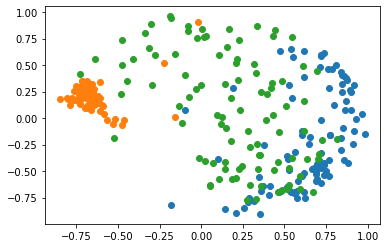

In [20]:
plt.scatter(X_train[:100, 0], X_train[:100, 1])
plt.scatter(X_train[100:200, 0], X_train[100:200, 1])
plt.scatter(X_train[200:300, 0], X_train[200:300, 1])

# Quantum

In [21]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer

qml.enable_tape()


# Set a random seed
np.random.seed(42)

In [22]:
def plot_data(x, y, fig=None, ax=None):
    """
    Plot data with red/blue values for a binary classification.

    Args:
        x (array[tuple]): array of data points as tuples
        y (array[int]): array of data points as tuples
    """
    if fig == None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    reds = y == 0
    blues = y == 1
    ax.scatter(x[reds, 0], x[reds, 1], c="red", s=20, edgecolor="k")
    ax.scatter(x[blues, 0], x[blues, 1], c="blue", s=20, edgecolor="k")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")

In [23]:
# Define output labels as quantum state vectors
def density_matrix(state):
    """Calculates the density matrix representation of a state.

    Args:
        state (array[complex]): array representing a quantum state vector

    Returns:
        dm: (array[complex]): array representing the density matrix
    """
    return state * np.conj(state).T


label_0 = [[1], [0]]
label_1 = [[0], [1]]
state_labels = [label_0, label_1]

In [24]:
dev = qml.device("default.qubit", wires=1)
# Install any pennylane-plugin to run on some particular backend


@qml.qnode(dev)
def qcircuit(params, x=None, y=None):
    """A variational quantum circuit representing the Universal classifier.

    Args:
        params (array[float]): array of parameters
        x (array[float]): single input vector
        y (array[float]): single output state density matrix

    Returns:
        float: fidelity between output state and input
    """
    for i in range(len(params[0])):
      for j in range(int(len(x)/3)):
        qml.Rot(*(params[0][i][3*j:3*(j+1)]*x[3*j:3*(j+1)] + params[1][i][3*j:3*(j+1)]), wires=0)
        #qml.Rot(*params[1][i][3*j:3*(j+1)], wires=0)
    return qml.expval(qml.Hermitian(y, wires=[0]))

In [25]:
def cost(params, x, y, state_labels=None):
    """Cost function to be minimized.

    Args:
        params (array[float]): array of parameters
        x (array[float]): 2-d array of input vectors
        y (array[float]): 1-d array of targets
        state_labels (array[float]): array of state representations for labels

    Returns:
        float: loss value to be minimized
    """
    # Compute prediction for each input in data batch
    loss = 0.0
    dm_labels = [density_matrix(s) for s in state_labels]
    for i in range(len(x)):
        f = qcircuit(params, x=x[i], y=dm_labels[y[i]])
        loss = loss + (1 - f) ** 2
    return loss / len(x)

In [26]:
def test(params, x, y, state_labels=None):
    """
    Tests on a given set of data.

    Args:
        params (array[float]): array of parameters
        x (array[float]): 2-d array of input vectors
        y (array[float]): 1-d array of targets
        state_labels (array[float]): 1-d array of state representations for labels

    Returns:
        predicted (array([int]): predicted labels for test data
        output_states (array[float]): output quantum states from the circuit
    """
    fidelity_values = []
    dm_labels = [density_matrix(s) for s in state_labels]
    predicted = []

    for i in range(len(x)):
        fidel_function = lambda y: qcircuit(params, x=x[i], y=y)
        fidelities = [fidel_function(dm) for dm in dm_labels]
        best_fidel = np.argmax(fidelities)

        predicted.append(best_fidel)
        fidelity_values.append(fidelities)

    return np.array(predicted), np.array(fidelity_values)


def accuracy_score(y_true, y_pred):
    """Accuracy score.

    Args:
        y_true (array[float]): 1-d array of targets
        y_predicted (array[float]): 1-d array of predictions
        state_labels (array[float]): 1-d array of state representations for labels

    Returns:
        score (float): the fraction of correctly classified samples
    """
    score = y_true == y_pred
    return score.sum() / len(y_true)


def iterate_minibatches(inputs, targets, batch_size):
    """
    A generator for batches of the input data

    Args:
        inputs (array[float]): input data
        targets (array[float]): targets

    Returns:
        inputs (array[float]): one batch of input data of length `batch_size`
        targets (array[float]): one batch of targets of length `batch_size`
    """
    for start_idx in range(0, inputs.shape[0] - batch_size + 1, batch_size):
        idxs = slice(start_idx, start_idx + batch_size)
        yield inputs[idxs], targets[idxs]

In [27]:
temp_0_train = np.delete(x_train_0[:28*9], np.where(quarter_filter == 0), axis=1)
temp_0_train = (temp_0_train - mu_train)/(std_train + 1e-8)
temp_0_train = pca.transform(temp_0_train)
temp_0_train = (temp_0_train.T / np.sqrt(np.sum(temp_0_train ** 2, -1))).T

temp_0_train.shape

(252, 6)

In [28]:
temp_train = np.concatenate((
    temp_0_train,
    X_train[Y_train == 1, :][:28],
    X_train[Y_train == 2, :][:28],
    X_train[Y_train == 3, :][:28],
    X_train[Y_train == 4, :][:28],
    X_train[Y_train == 5, :][:28],
    X_train[Y_train == 6, :][:28],
    X_train[Y_train == 7, :][:28],
    X_train[Y_train == 8, :][:28],
    X_train[Y_train == 9, :][:28]), axis=0)

temp_test = np.concatenate((
    X_test[Y_test == 0, :][:55*9],
    X_test[Y_test == 1, :][:55],
    X_test[Y_test == 2, :][:55],
    X_test[Y_test == 3, :][:55],
    X_test[Y_test == 4, :][:55],
    X_test[Y_test == 5, :][:55],
    X_test[Y_test == 6, :][:55],
    X_test[Y_test == 7, :][:55],
    X_test[Y_test == 8, :][:55],
    X_test[Y_test == 9, :][:55]), axis=0)

temp_train.shape, temp_test.shape

((504, 6), (990, 6))

In [29]:
Y_train = np.zeros((temp_train.shape[0],), dtype=int)
Y_train[:int(Y_train.shape[0]/2)] = 1

Y_test = np.zeros((temp_test.shape[0],), dtype=int)
Y_test[:int(Y_test.shape[0]/2)] = 1

Y_train.shape, Y_test.shape

((504,), (990,))

In [30]:
X_train = temp_train.copy()
X_test = temp_test.copy()

X_train.shape, X_test.shape

((504, 6), (990, 6))

In [220]:
'''
X_train = X_train[:200, :]
Y_train = Y_train[:200]

X_test = X_test[:200*5, :]
Y_test = Y_test[:200*5]
'''

In [31]:
# Train using Adam optimizer and evaluate the classifier
num_layers = 5
learning_rate = 0.1
epochs = 100
batch_size = 32

opt = AdamOptimizer(learning_rate)

# initialize random weights
theta = np.random.uniform(size=(num_layers, 6))
w = np.random.uniform(size=(num_layers, 6))
params = [w, theta]

predicted_train, fidel_train = test(params, X_train, Y_train, state_labels)
accuracy_train = accuracy_score(Y_train, predicted_train)

predicted_test, fidel_test = test(params, X_test, Y_test, state_labels)
accuracy_test = accuracy_score(Y_test, predicted_test)

# save predictions with random weights for comparison
initial_predictions = predicted_test

loss = cost(params, X_test, Y_test, state_labels)

print(
    "Epoch: {:2d} | Loss: {:3f} | Train accuracy: {:3f} | Test Accuracy: {:3f}".format(
        0, loss, accuracy_train, accuracy_test
    )
)

for it in range(epochs):
    for Xbatch, ybatch in iterate_minibatches(X_train, Y_train, batch_size=batch_size):
        params = opt.step(lambda v: cost(v, Xbatch, ybatch, state_labels), params)

    predicted_train, fidel_train = test(params, X_train, Y_train, state_labels)
    accuracy_train = accuracy_score(Y_train, predicted_train)
    loss = cost(params, X_train, Y_train, state_labels)

    predicted_test, fidel_test = test(params, X_test, Y_test, state_labels)
    accuracy_test = accuracy_score(Y_test, predicted_test)
    res = [it + 1, loss, accuracy_train, accuracy_test]
    print(
        "Epoch: {:2d} | Loss: {:3f} | Train accuracy: {:3f} | Test accuracy: {:3f}".format(
            *res
        )
    )

Epoch:  0 | Loss: 0.515244 | Train accuracy: 0.315476 | Test Accuracy: 0.346465


C:\Users\RADAR\anaconda3\lib\site-packages\pennylane\tape\tapes\jacobian_tape.py:461: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  params = np.array(params)


Epoch:  1 | Loss: 0.435289 | Train accuracy: 0.386905 | Test accuracy: 0.362626
Epoch:  2 | Loss: 0.241407 | Train accuracy: 0.652778 | Test accuracy: 0.567677
Epoch:  3 | Loss: 0.227626 | Train accuracy: 0.706349 | Test accuracy: 0.575758
Epoch:  4 | Loss: 0.336185 | Train accuracy: 0.454365 | Test accuracy: 0.462626
Epoch:  5 | Loss: 0.115261 | Train accuracy: 0.867063 | Test accuracy: 0.843434
Epoch:  6 | Loss: 0.108867 | Train accuracy: 0.898810 | Test accuracy: 0.867677
Epoch:  7 | Loss: 0.117005 | Train accuracy: 0.884921 | Test accuracy: 0.815152
Epoch:  8 | Loss: 0.359412 | Train accuracy: 0.337302 | Test accuracy: 0.315152
Epoch:  9 | Loss: 0.204500 | Train accuracy: 0.696429 | Test accuracy: 0.710101
Epoch: 10 | Loss: 0.084993 | Train accuracy: 0.902778 | Test accuracy: 0.893939
Epoch: 11 | Loss: 0.090173 | Train accuracy: 0.926587 | Test accuracy: 0.904040
Epoch: 12 | Loss: 0.073252 | Train accuracy: 0.920635 | Test accuracy: 0.898990
Epoch: 13 | Loss: 0.046681 | Train accur

KeyboardInterrupt: 

In [146]:
qml.Rot(*(params[0][0][0:3]*X_train[0, 0:3] + params[1][0][0:3]), wires=[0])

Rot(tensor(0.49614069, requires_grad=True), tensor(-0.43716591, requires_grad=True), tensor(0.82577959, requires_grad=True), wires=[0])

In [134]:
params[1][0][0:3]

tensor([0.37454012, 0.95071431, 0.73199394], requires_grad=True)